In [1]:
!pip install quandl
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Set some formatting config defaults
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
# Part 1
#Get data from QUANDL
quandl.ApiConfig.api_key = "gERG55iVtyuwrFArih4a"
data = quandl.get(['FRED/DSWP1', 'FRED/DSWP2', 'FRED/DSWP3', 'FRED/DSWP4',
'FRED/DSWP5', 'FRED/DSWP7', 'FRED/DSWP10', 'FRED/DSWP30'])



DSWP1     0
DSWP2     0
DSWP3     0
DSWP4     3
DSWP5     0
DSWP7     0
DSWP10    0
DSWP30    0
dtype: int64


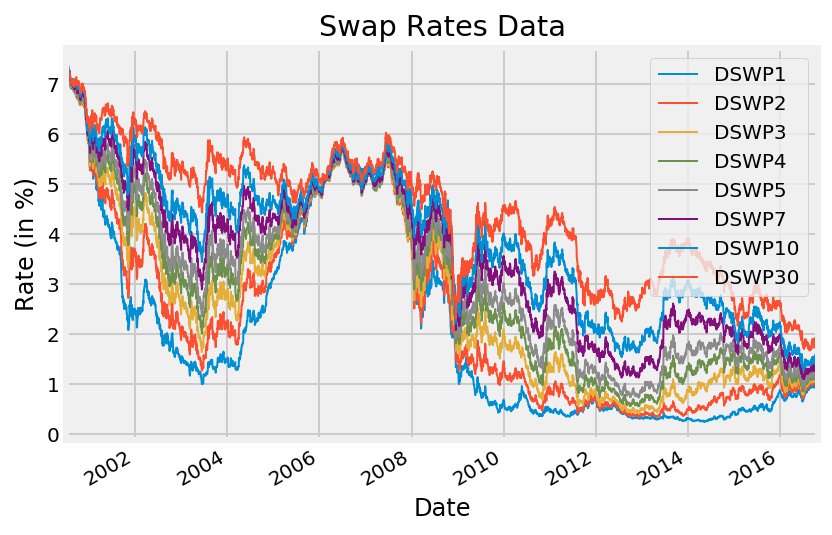

In [3]:
#Rename columns
rname = {'FRED/DSWP1 - VALUE': 'DSWP1',
         'FRED/DSWP2 - VALUE': 'DSWP2',
         'FRED/DSWP3 - VALUE': 'DSWP3',
         'FRED/DSWP4 - VALUE': 'DSWP4',
         'FRED/DSWP5 - VALUE': 'DSWP5',
         'FRED/DSWP7 - VALUE': 'DSWP7',
         'FRED/DSWP10 - VALUE': 'DSWP10',
         'FRED/DSWP30 - VALUE': 'DSWP30'
        }

data.rename(columns=rname,inplace=True)
#check for missing values, see DSWP4 has 3 missing values
print(data.isnull().sum())

data.dropna(inplace=True)

#Plot Timeseries
data.plot(lw=1)
    
plt.legend(loc='upper right',fontsize=10)
plt.title('Swap Rates Data')
plt.ylabel('Rate (in %)')
plt.xlabel('Date')
plt.show()


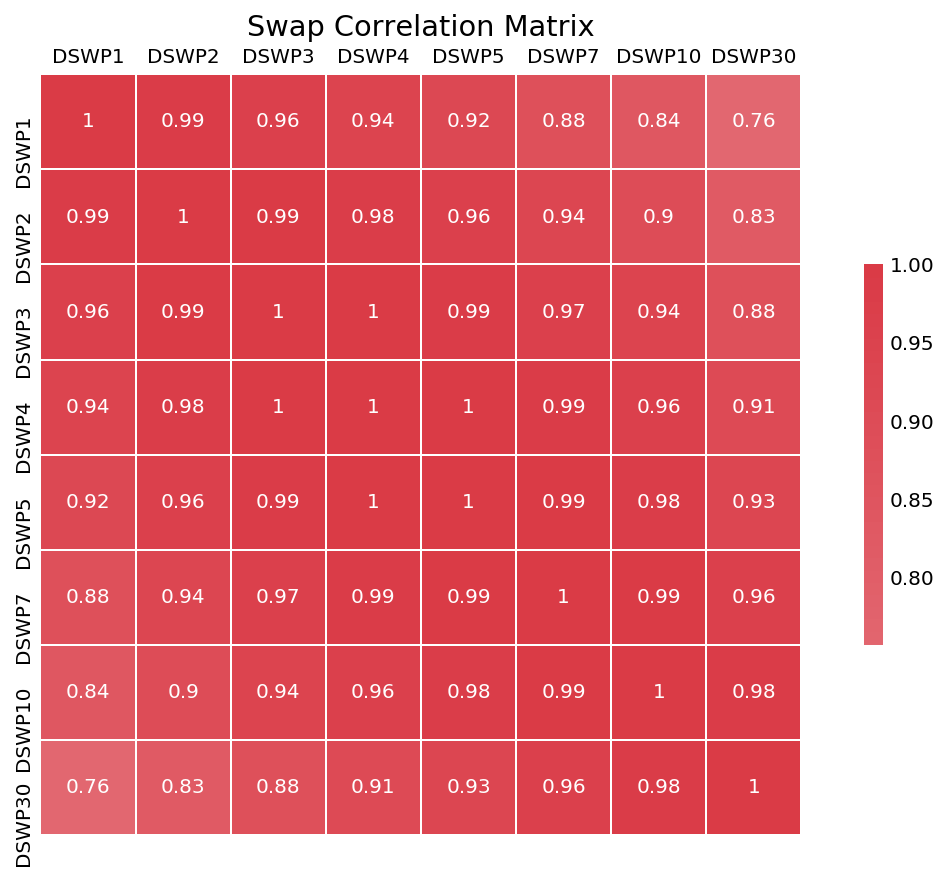

In [4]:
#covariance matrix
cov_mat = data.cov()

#Correlation matrix
corr_mat = data.corr()
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(240, 10,n=9, as_cmap=True)
ax = sns.heatmap(corr_mat, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
ax.xaxis.set_ticks_position('top')
ax.set_title("Swap Correlation Matrix",y=1.05)
plt.show()

Loadings:  [[ 0.39827188  0.39447681  0.38506808  0.37129862  0.35650789  0.33030745
   0.30486316  0.26549017]
 [-0.58286236 -0.33076451 -0.12527871  0.02463563  0.13613799  0.27902069
   0.39104495  0.5340996 ]
 [-0.54735975  0.01422259  0.30335154  0.36944971  0.31672626  0.12184084
  -0.13166566 -0.58239438]]
PVE:  [0.9524868  0.04397261 0.00312241]


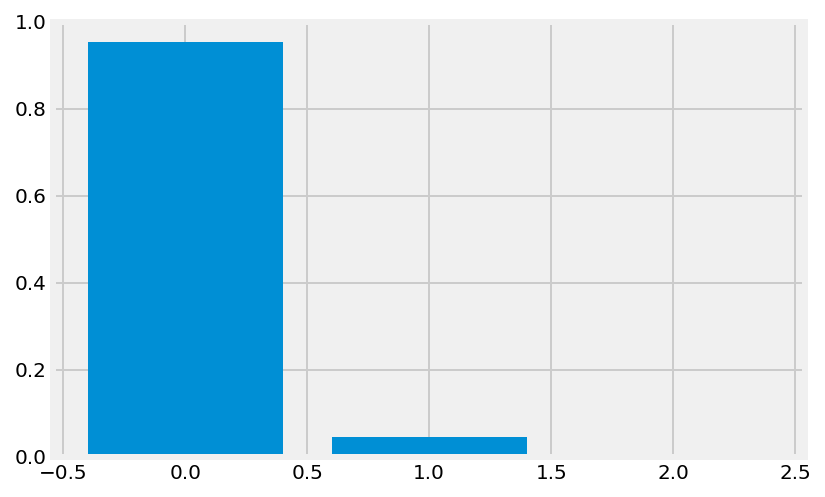

In [5]:
# Part 3
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_comps = pca.fit_transform(data)
plt.bar(range(3),pca.explained_variance_ratio_) #third component is too small relative to other 2

print("Loadings: ",pca.components_)
print("PVE: ",pca.explained_variance_ratio_)
plt.show()

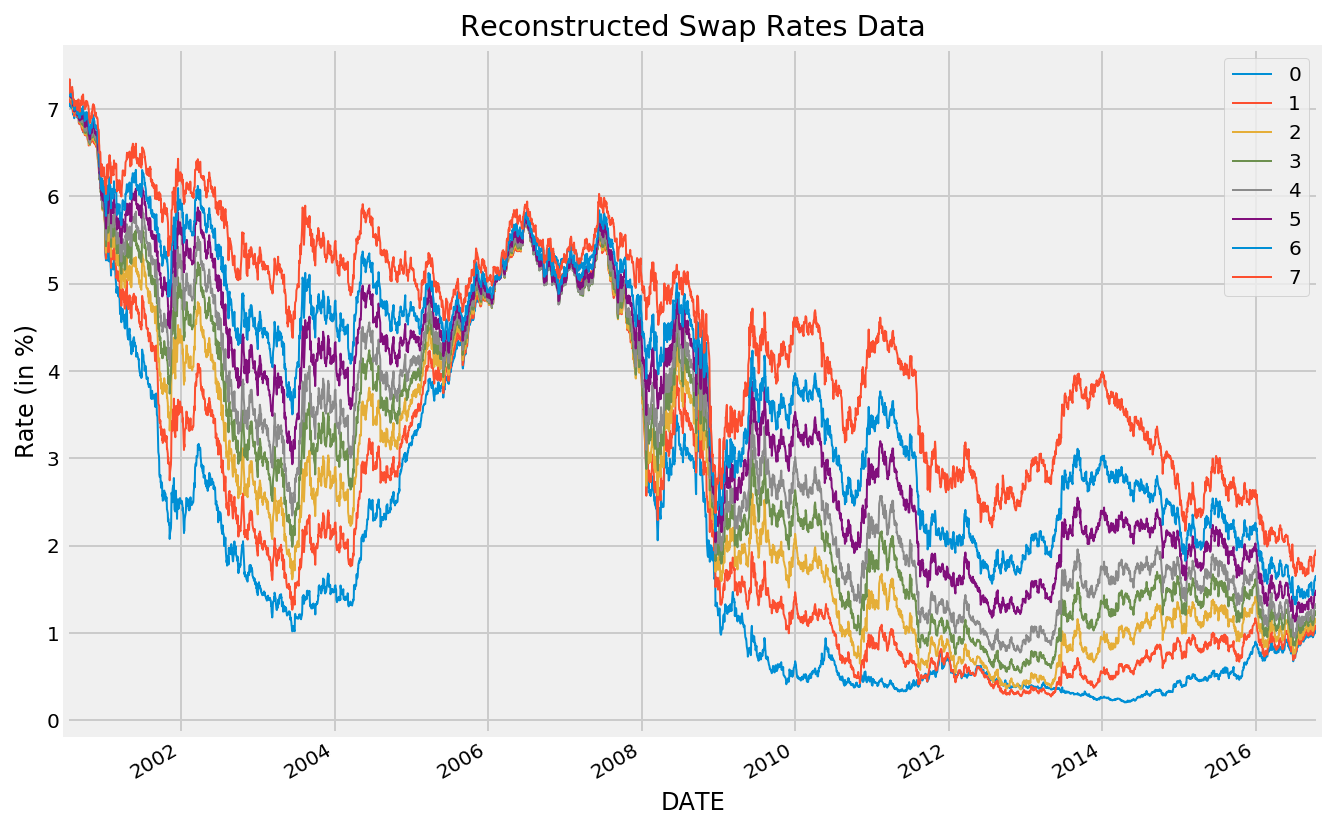

In [6]:
projected = pca.inverse_transform(principal_comps)

#just take the dates from the original
data_recon = pd.DataFrame(data=projected,index=data.index)
data_recon.plot(lw=1,figsize=(10,7))
plt.title('Reconstructed Swap Rates Data')
plt.ylabel('Rate (in %)')
plt.show()

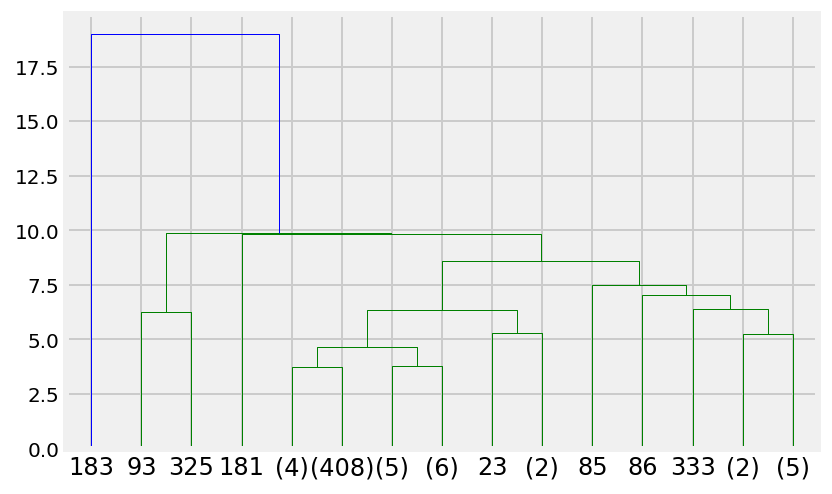

In [7]:
###########################
# Parts 4 & 5
###########################

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 0.5
cust_data = pd.read_csv('customers_data.csv')
cust_data_norm = (cust_data-cust_data.mean())/cust_data.std()
Z = linkage(cust_data_norm,'average')
dendrogram(Z,orientation='top',truncate_mode='lastp',p=15)
plt.show()

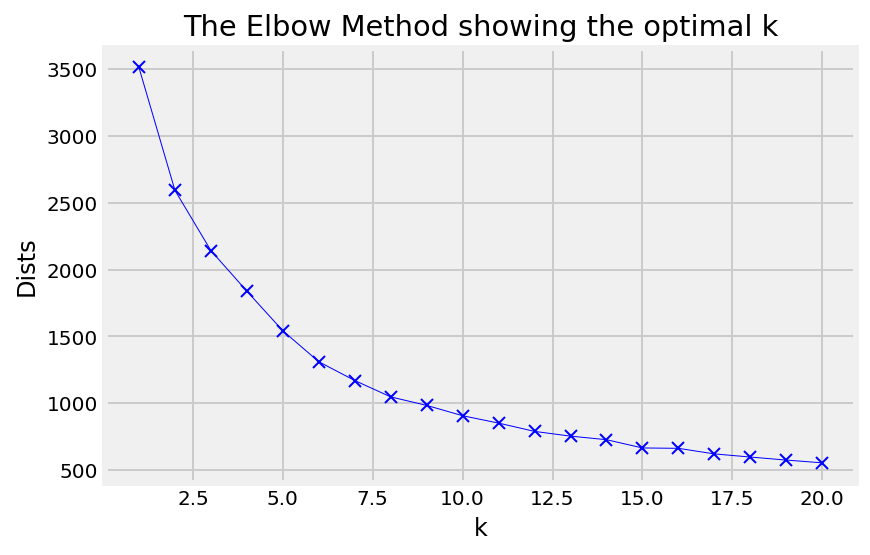

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
dists = []
K = range(1,21)
inertia = []

for k in K:
    if k == 2:
        # save k =2 for next part
        kmeans=KMeans(k).fit(cust_data_norm)
    inertia.append(KMeans(k).fit(cust_data_norm).inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Dists')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

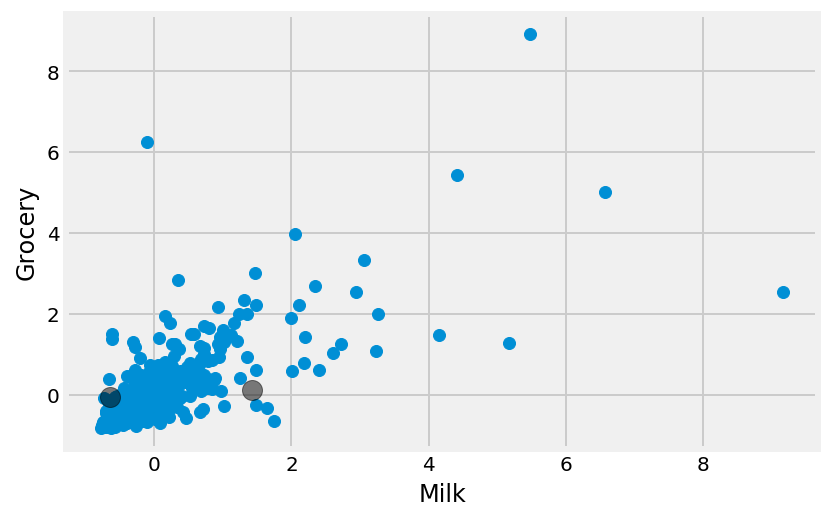

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(cust_data_norm['Milk'], cust_data_norm['Grocery'], marker='o')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Milk')
ax.set_ylabel('Grocery')


plt.show()
